In [1]:
!pip install boto3

In [2]:
import io
import os
import tarfile
import tempfile

import boto3
import matplotlib.pyplot as plt
import requests
from botocore import UNSIGNED
from botocore.config import Config
from IPython.display import Audio
from torchaudio.utils import download_asset

SAMPLE_GSM = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.gsm")
SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
SAMPLE_WAV_8000 = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042-8000hz.wav")


def _hide_seek(obj):
    class _wrapper:
        def __init__(self, obj):
            self.obj = obj

        def read(self, n):
            return self.obj.read(n)

    return _wrapper(obj)


/tmp/ipython-input-308558975.py:14: UserWarning: torchaudio.utils.download.download_asset has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  SAMPLE_GSM = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.gsm")
100%|██████████| 7.99k/7.99k [00:00<00:00, 17.0MB/s]
/tmp/ipython-input-308558975.py:15: UserWarning: torchaudio.utils.download.download_asset has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
100%|██████████| 106k/106k [00:00<00:00, 36.4MB/s]
/tmp/ipython-input-308558975.py:16: Use

In [7]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

2.8.0+cu126
2.8.0+cu126


In [8]:
metadata = torchaudio.info(SAMPLE_WAV)
print(metadata)

AudioMetaData(sample_rate=16000, num_frames=54400, num_channels=1, bits_per_sample=16, encoding=PCM_S)


/tmp/ipython-input-3458049858.py:1: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  metadata = torchaudio.info(SAMPLE_WAV)


/tmp/ipython-input-1722011561.py:6: UserWarning: torchaudio.utils.download.download_asset has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/t

waveform shape: torch.Size([1, 54400]) sample_rate: 16000
Saved: waveform.png, spectrogram.png


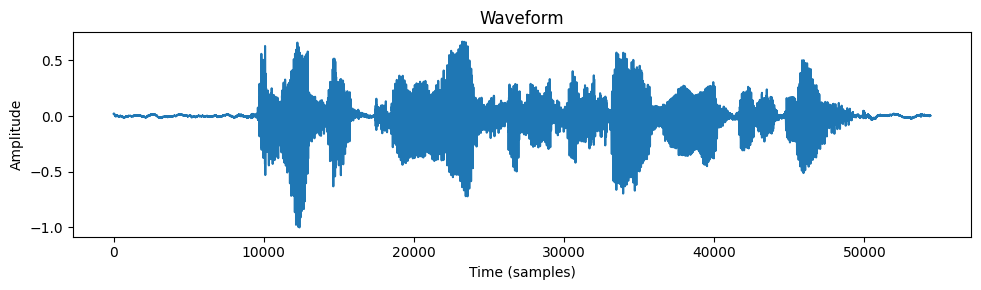

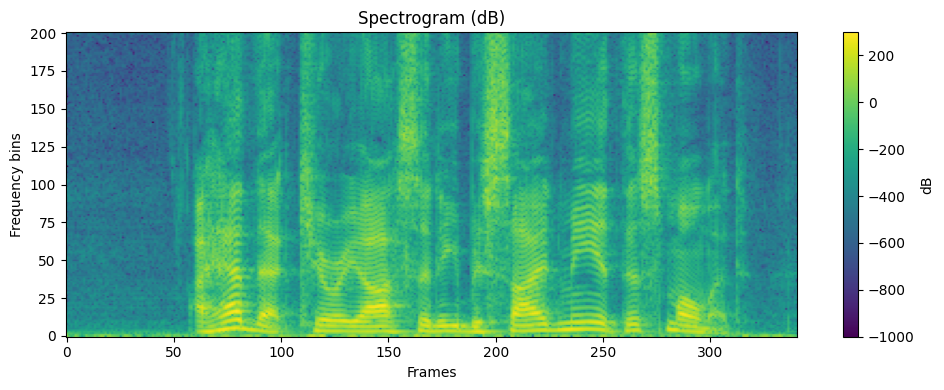

In [9]:
import torchaudio
import matplotlib.pyplot as plt
from torchaudio.utils import download_asset
from torchaudio.transforms import Spectrogram

SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")

waveform, sample_rate = torchaudio.load(SAMPLE_WAV)  # shape: [channels, time]
print("waveform shape:", waveform.shape, "sample_rate:", sample_rate)

plt.figure(figsize=(10, 3))
plt.title("Waveform")
plt.plot(waveform.t().numpy())
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.savefig("waveform.png", dpi=150)

spec = Spectrogram(n_fft=400, win_length=400, hop_length=160, power=2.0)
S = spec(waveform)  # shape: [channels, freq, time]


S_db = 10 * torchaudio.functional.amplitude_to_DB(S, multiplier=10.0, amin=1e-10, db_multiplier=0.0)

plt.figure(figsize=(10, 4))
plt.title("Spectrogram (dB)")
plt.imshow(S_db[0].numpy(), origin="lower", aspect="auto")
plt.xlabel("Frames")
plt.ylabel("Frequency bins")
plt.colorbar(label="dB")
plt.tight_layout()
plt.savefig("spectrogram.png", dpi=150)

print("Saved: waveform.png, spectrogram.png")

After installing `boto3`, you can run the previous cell again.